# COMS W4995 Project 1

In [1]:
import pandas as pd
import numpy as np
import os
current_directory = os.getcwd()

try:
    df = pd.read_csv(current_directory + "/data/top_10000_1960-now.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(current_directory + "/data/top_10000_1960-now.csv", encoding='latin1')

print(df)

print("Shape of Dataset: ", df.shape) # (9999, 35)
features = df.columns
print("Features: ", features)

# Drop columns a bit with a lot of NaN values that don't matter for now.
df.drop(columns = ['Track URI', 'Album Artist URI(s)', 'Album Genres', 'Track Preview URL', 'Album Image URL', 'Copyrights', 'Artist Genres'], inplace = True)

print(df.isna().sum())
# There are 50 NaN values for "in_shazam_charts" and 95 NaN for "key". Will drop these rows

df = df.dropna()

columns = ['Track Duration (ms)', 'Tempo', 'Time Signature', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
zero_counts = df[columns].eq(0).sum()
print(zero_counts)

zero_columns = ['Track Duration (ms)', 'Tempo', 'Time Signature', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']
mask = df[zero_columns].eq(0).any(axis = 1)
df = df[~mask]
zero_counts = df[columns].eq(0).sum()

mean_instr = df['Instrumentalness'].mean()
print(mean_instr)
df['Instrumentalness'] = df['Instrumentalness'].replace(0, mean_instr)

## Cleaning second dataset
try:
    df2 = pd.read_csv(current_directory +"/data/dataset.csv", encoding='utf-8')
except UnicodeDecodeError:
    df2 = pd.read_csv(current_directory +"/data/dataset.csv", encoding='latin1')

print(df2)

print("Shape of Dataset: ", df2.shape) # (9999, 35)
features2 = df2.columns
print("Features: ", features2)

df2 = df2[df2[['Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38']].isna().all(axis = 1)]
print(df2)

print(df2.isna().sum())

df2 = df2.drop(columns = ['Unnamed: 0', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38'])

columns2 = ['release_date', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake_the_audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual_perceptions',
       'family/spirtual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

mean2_instr = df2['instrumentalness'].mean()
print(mean2_instr)
df2['instrumentalness'] = df2['instrumentalness'].replace(0, mean2_instr)

zero_columns2 = ['loudness', 'valence', 'energy']
mask2 = df2[zero_columns2].eq(0).any(axis = 1)
df2 = df2[~mask2]

                                 Track URI  \
0     spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1     spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2     spotify:track:70XtWbcVZcpaOddJftMcVi   
3     spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4     spotify:track:72WZtWs6V7uu3aMgMmEkYe   
...                                    ...   
9994  spotify:track:3kcKlOkQQEPVwxwljbGJ5p   
9995  spotify:track:5k9QrzJFDAp5cXVdzAi02f   
9996  spotify:track:5ydeCNaWDmFbu4zl0roPAH   
9997  spotify:track:0zKbDrEXKpnExhGQRe9dxt   
9998  spotify:track:3iKuIfvoU50eww6EVzNqHo   

                                             Track Name  \
0               Justified & Ancient - Stand by the Jams   
1                       I Know You Want Me (Calle Ocho)   
2                    From the Bottom of My Broken Heart   
3                      Apeman - 2014 Remastered Version   
4                    You Can't Always Get What You Want   
...                                                 ...   
9994                       Kernkra

C:\Users\amari\AppData\Local\Temp\ipykernel_33624\3420767908.py:40: DtypeWarning: Columns (10,12,13,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(current_directory +"/data/dataset.csv", encoding='utf-8')


## Preprocessing

In [83]:
# get columns that are in df but not in df2
cols_to_use = df2.columns.str.title().difference(df.columns)
cols_to_use.str.lower()

Index(['age', 'artist_name', 'communication', 'dating', 'family/gospel',
       'family/spirtual', 'feelings', 'genre', 'len',
       'light/visual_perceptions', 'like/girls', 'lyrics', 'movement/places',
       'music', 'night/time', 'obscene', 'release_date', 'romantic', 'sadness',
       'shake_the_audience', 'topic', 'track_name', 'violence', 'world/life'],
      dtype='object')

In [88]:
# Merge datasets
new_song_df = pd.merge(df, df2[cols_to_use.str.lower()], left_index=True, right_index=True, how='outer')

In [90]:
from sklearn.impute import SimpleImputer

# Select numerical and categorical columns
numerical_columns = new_song_df.select_dtypes(exclude='object')

categorical_columns = new_song_df.select_dtypes(include='object')

# Impute missing values for numerical variables
numerical_imputer = SimpleImputer(strategy="mean")

numerical_imputed_df = (
    pd.DataFrame(numerical_imputer.fit_transform(numerical_columns), 
                 columns=numerical_columns.columns)
)

# Impute missing values for categorical variables
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed_df = (
    pd.DataFrame(categorical_imputer.fit_transform(categorical_columns), 
                 columns=categorical_columns.columns)
)

# Concatenate the numerical and categorical imputed DataFrames
imputed_song_data = pd.concat([categorical_imputed_df, numerical_imputed_df], axis=1)

# display data
imputed_song_data

,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist Name(s),Album Release Date,Explicit,ISRC,Added By,...,communication,family/spirtual,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,sadness,shake_the_audience
0,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,The KLF,1992-08-03,False,QMARG1760056,spotify:user:bradnumber1,...,0.263751,0.000598,0.117175,0.000598,0.000598,0.000598,0.039288,0.000598,0.380299,0.000598
1,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,Pitbull,2009-10-23,False,USJAY0900144,spotify:user:bradnumber1,...,0.001284,0.051124,0.001284,0.212681,0.001284,0.001284,0.118034,0.001284,0.001284,0.001284
2,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,False,USJI19910455,spotify:user:bradnumber1,...,0.250668,0.002770,0.225422,0.002770,0.002770,0.002770,0.323794,0.002770,0.002770,0.002770
3,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,False,GB5KW1499822,spotify:user:bradnumber1,...,0.001548,0.001548,0.001548,0.001548,0.081132,0.129250,0.001548,0.001548,0.225889,0.021500
4,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,The Rolling Stones,1969-12-05,False,USA176910100,spotify:user:bradnumber1,...,0.001350,0.029755,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.068800,0.001350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27861,One,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:43lok9zd7BW5CoYkXZs7S0,Greatest Hits,Various Artists,2009-01-01,False,NLF057890004,spotify:user:bradnumber1,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.435089,0.001350,0.391651,0.065664,0.001350
27862,One,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:43lok9zd7BW5CoYkXZs7S0,Greatest Hits,Various Artists,2009-01-01,False,NLF057890004,spotify:user:bradnumber1,...,0.203889,0.001284,0.001284,0.001284,0.040811,0.134955,0.058152,0.318910,0.001284,0.001284
27863,One,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:43lok9zd7BW5CoYkXZs7S0,Greatest Hits,Various Artists,2009-01-01,False,NLF057890004,spotify:user:bradnumber1,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.068684,0.001504,0.356685,0.001504,0.039755
27864,One,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:43lok9zd7BW5CoYkXZs7S0,Greatest Hits,Various Artists,2009-01-01,False,NLF057890004,spotify:user:bradnumber1,...,0.001196,0.001196,0.001196,0.202659,0.070867,0.001196,0.103614,0.492434,0.001196,0.048359


In [91]:
# drop irrelevnant columns
song_df = imputed_song_data.drop(columns=['Disc Number', 'Popularity', 'Track Number','Track Duration (ms)','Album URI','Artist URI(s)', 'Album Release Date', 'ISRC',
       'Added By', 'Added At', 'Label', 'release_date','len', 'Time Signature', 'Mode', 'lyrics'])

In [93]:
# Step 3: Manual Mood Labeling

# calculate mood from energy and valence offset from sadness
song_df['mood_%'] = (
    ((song_df['Energy'] + song_df['Valence']) / 2)
      * (1 - song_df['sadness'])
)

# create mood label column based on mood %
def mood_label(mood):
    if mood < 0.3:
        return 'Low Emotion'
    elif 0.3 <= mood < 0.6:
        return 'Neutral'
    else:
        return 'High Emotion'

# apply mood label function to create new column
song_df['mood'] = song_df['mood_%'].apply(mood_label)

song_df


,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Explicit,age,artist_name,dating,family/gospel,genre,...,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,sadness,shake_the_audience,mood_%,mood
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,False,1,mukesh,0.000598086,0.048857,pop,...,0.117175,0.000598,0.000598,0.000598,0.039288,0.000598,0.380299,0.000598,0.426354,Neutral
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,False,1,'frankie laine',0.035537134,0.027007,pop,...,0.001284,0.212681,0.001284,0.001284,0.118034,0.001284,0.001284,0.001284,0.770510,High Emotion
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,False,1,'johnnie ray',0.002770083,0.00277,pop,...,0.225422,0.002770,0.002770,0.002770,0.323794,0.002770,0.002770,0.002770,0.683601,High Emotion
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,False,1,'prez prado',0.048249124,0.001548,pop,...,0.001548,0.001548,0.081132,0.129250,0.001548,0.001548,0.225889,0.021500,0.604193,High Emotion
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,False,1,'giorgos papadopoulos',0.001349528,0.00135,pop,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.068800,0.001350,0.523334,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27861,One,Taylor Swift,Greatest Hits,Various Artists,False,0.014285714,'mack 10',0.001349528,0.001349528,'hip hop',...,0.001350,0.001350,0.001350,0.435089,0.001350,0.391651,0.065664,0.001350,0.592699,Neutral
27862,One,Taylor Swift,Greatest Hits,Various Artists,False,0.014285714,m.o.p.,0.001283697,0.001283697,'hip hop',...,0.001284,0.001284,0.040811,0.134955,0.058152,0.318910,0.001284,0.001284,0.633539,High Emotion
27863,One,Taylor Swift,Greatest Hits,Various Artists,False,0.014285714,nine,0.001503759,0.001503759,'hip hop',...,0.001504,0.001504,0.001504,0.068684,0.001504,0.356685,0.001504,0.039755,0.633399,High Emotion
27864,One,Taylor Swift,Greatest Hits,Various Artists,False,0.014285714,'will smith',0.001196172,0.001196172,'hip hop',...,0.001196,0.202659,0.070867,0.001196,0.103614,0.492434,0.001196,0.048359,0.633594,High Emotion


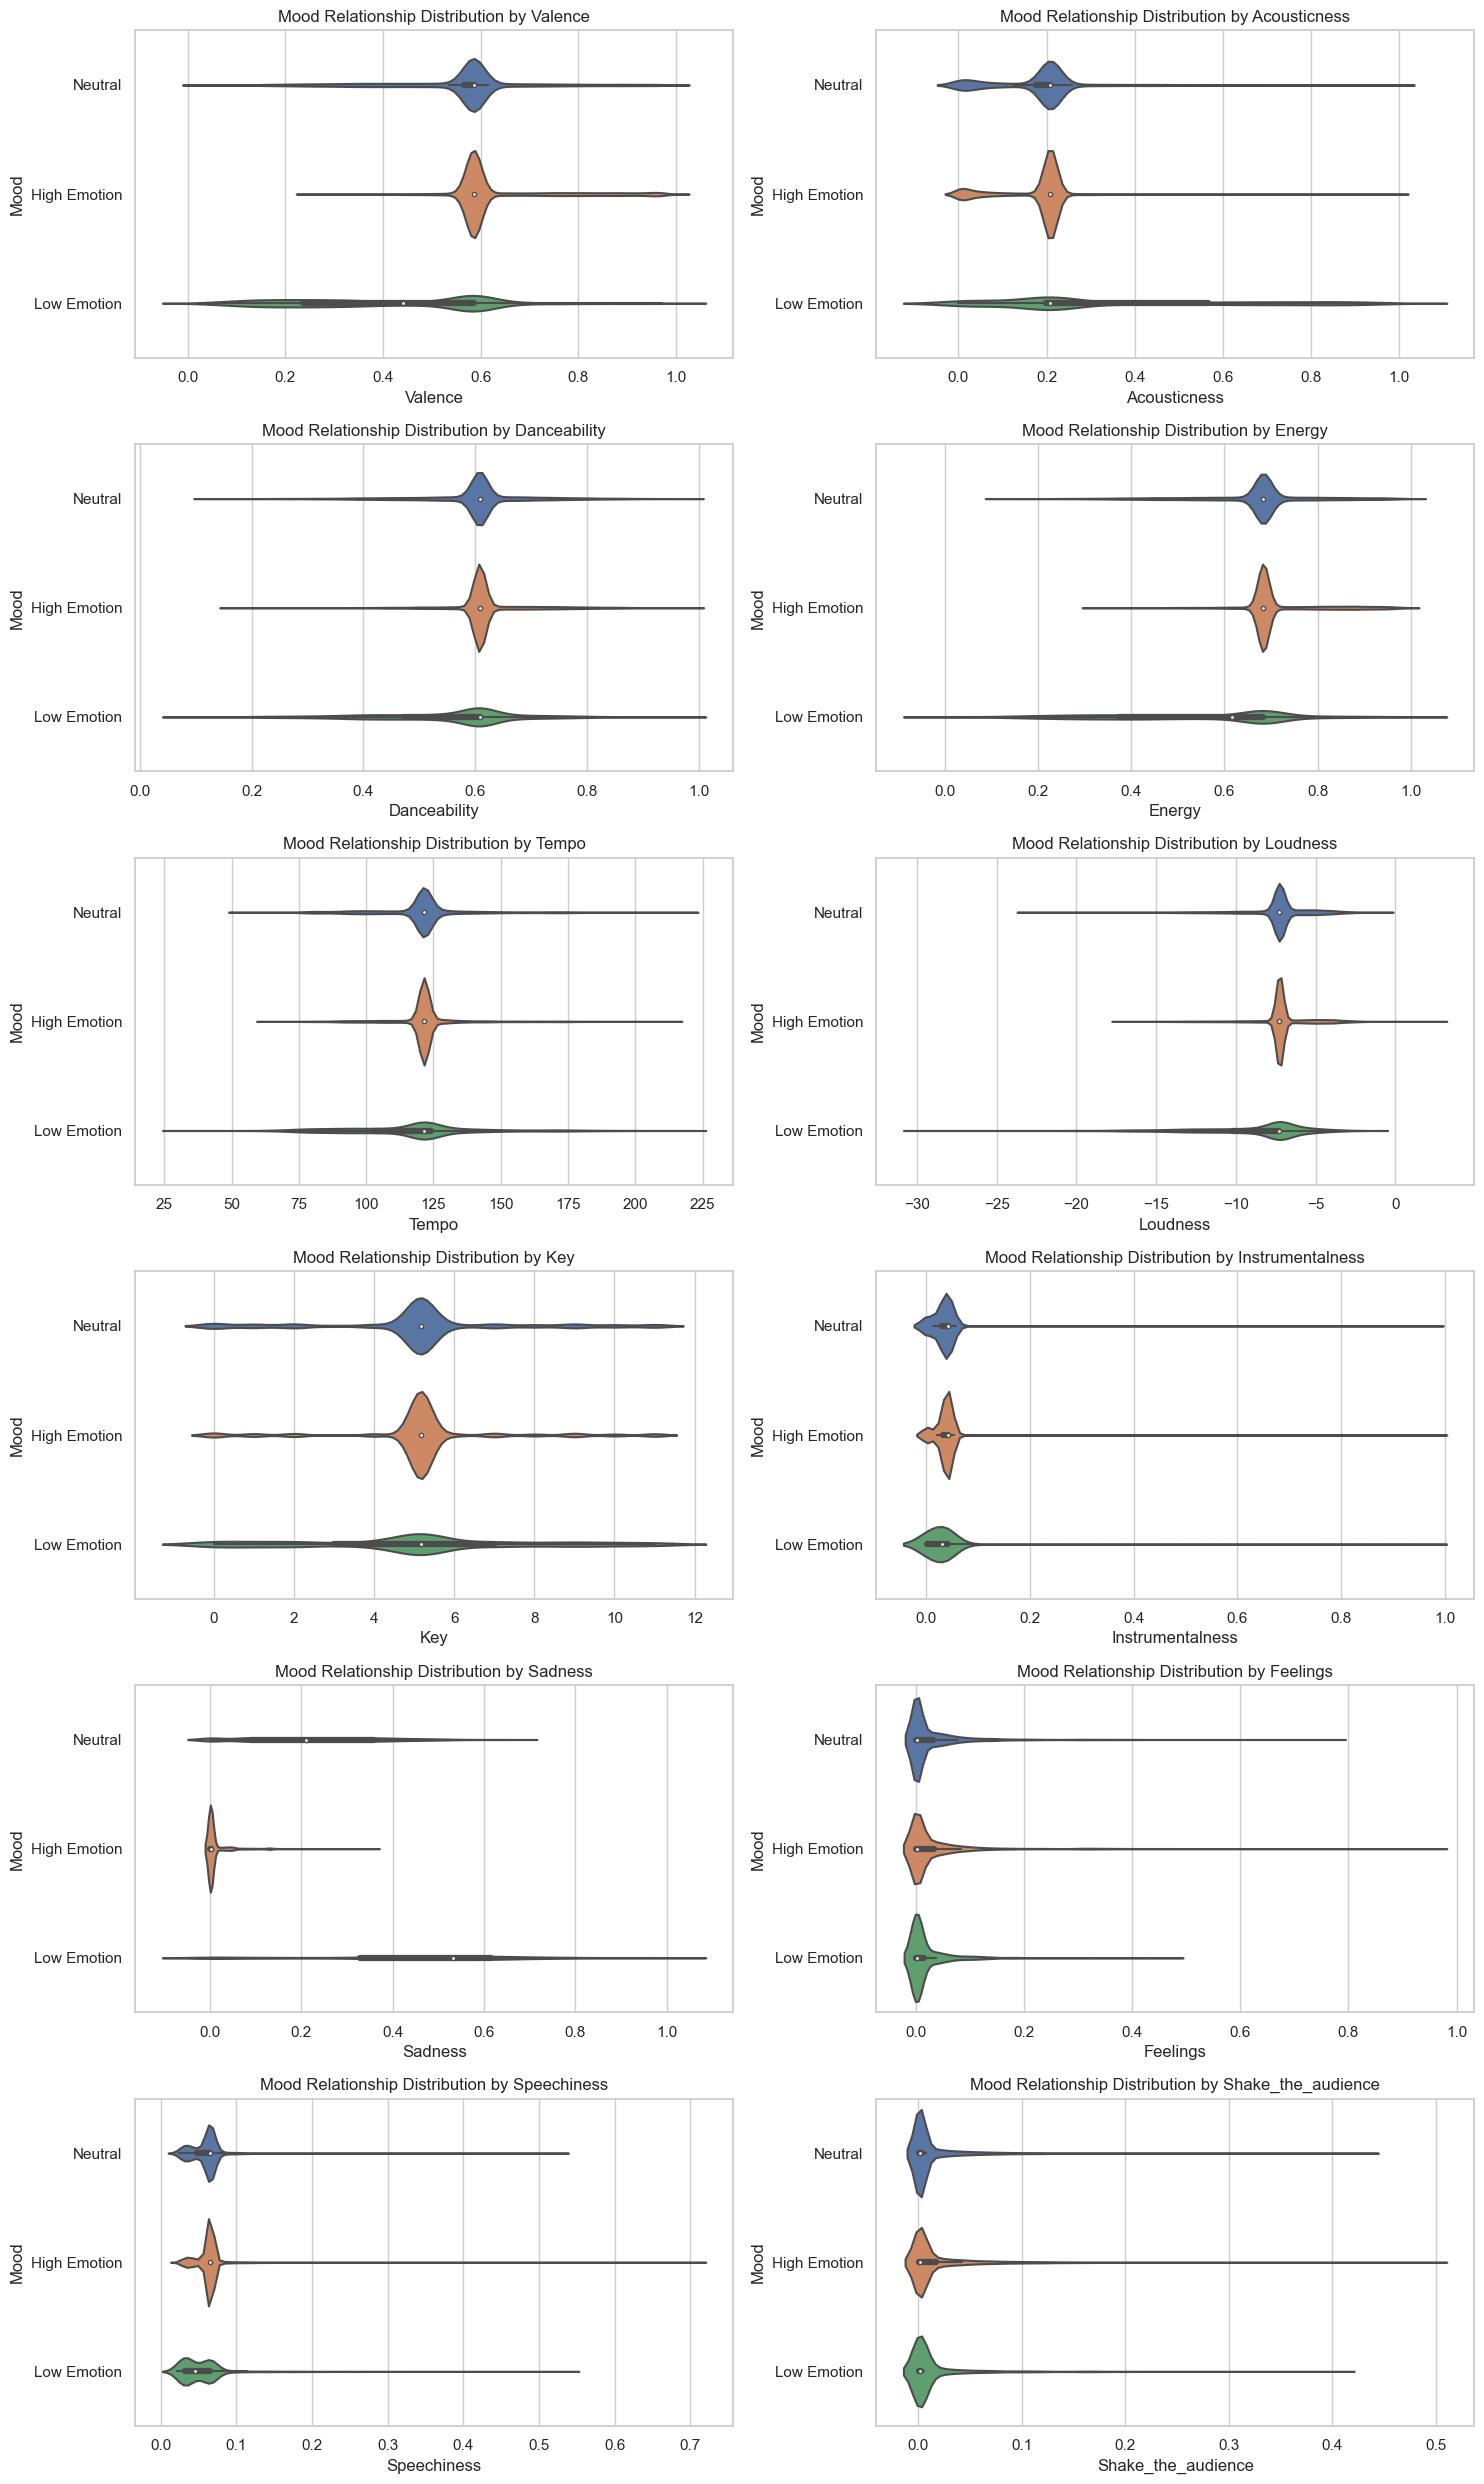

In [119]:
#  Data Visualization - Violin Plots, display distribution of features

import seaborn as sns
import matplotlib.pyplot as plt

features = ['Valence', 'Acousticness','Danceability', 'Energy', 
            'Tempo', 'Loudness', 'Key', 'Instrumentalness', 'sadness', 'feelings', 'Speechiness', 'shake_the_audience'] 


sns.set(style='whitegrid')
fig, ax = plt.subplots(6, 2, figsize=(15, 25))

# create mini violin  plots for each feature
for feature, subplot in zip(features, ax.flatten()):
    
    # Plot the violinplot

    sns.violinplot(x=feature, y='mood', data=song_df,  ax=subplot)
    
    # create labels for graph
    subplot.set_title(f'Mood Relationship Distribution by {feature.capitalize()}')
    subplot.set_xlabel(feature.capitalize())
    subplot.set_ylabel('Mood')

    
# add padding between the subgraphs
plt.tight_layout()

plt.show()


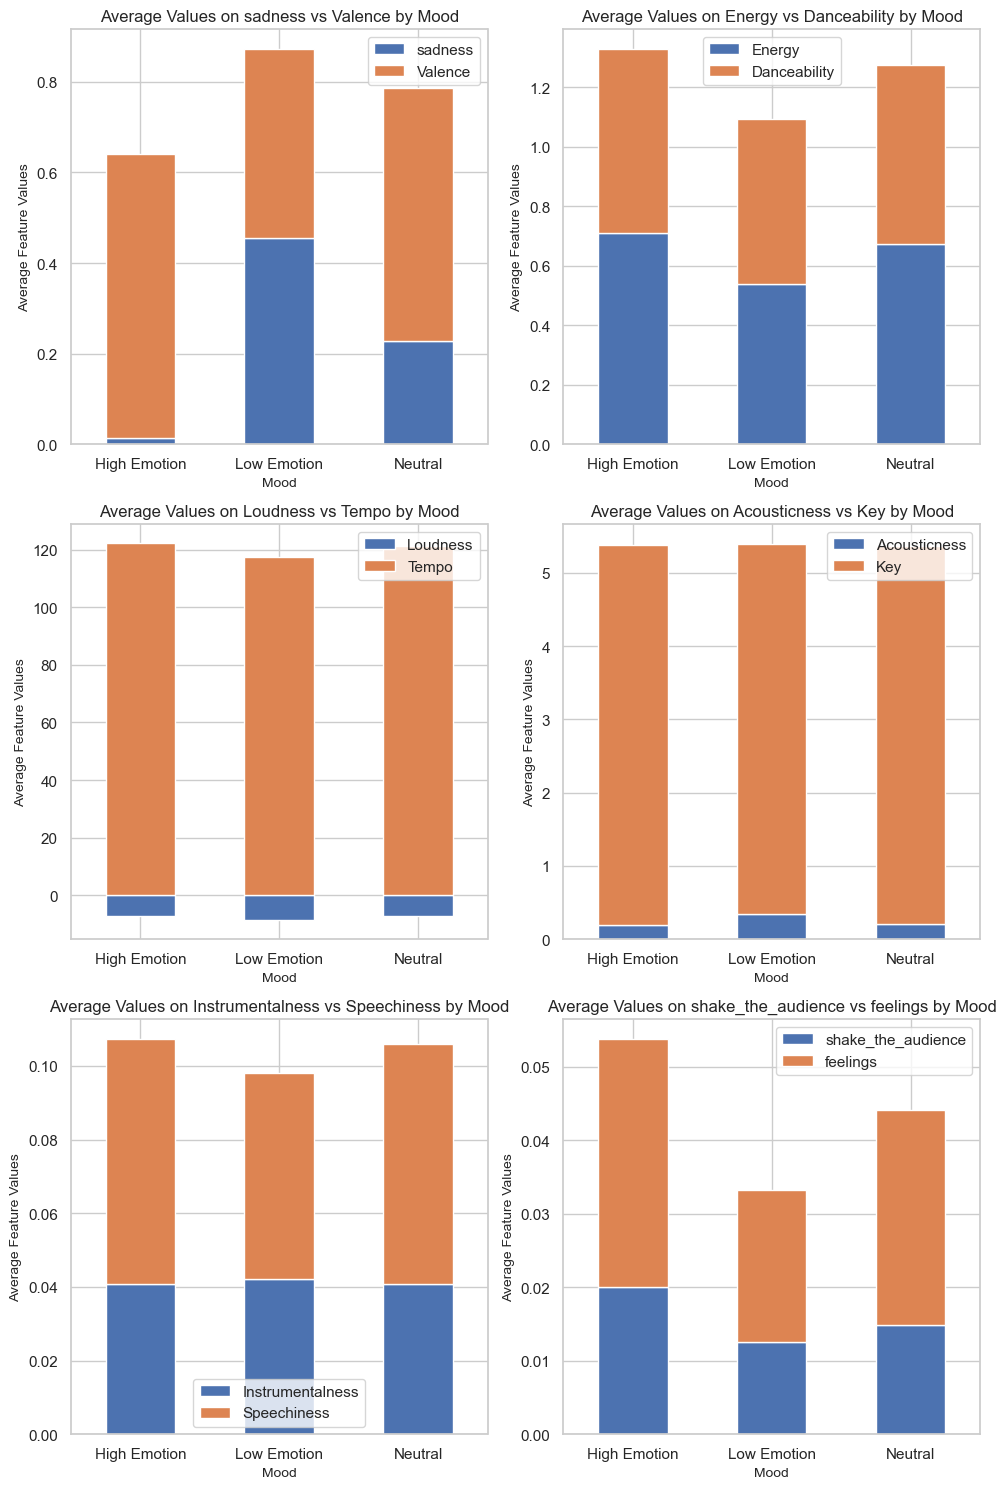

In [159]:
# Data Visualization - Stacked Bar Chart, display average feature values by mood category

features =[['sadness', 'Valence'], ['Energy', 'Danceability'], ['Loudness', 'Tempo'], ['Acousticness', 'Key'], ['Instrumentalness', 'Speechiness'], ['shake_the_audience', 'feelings']]

fig, ax = plt.subplots(3, 2, figsize=(10, 15))

fig.subplots_adjust(hspace=0.5, wspace=0.8)

# create mini stacked bar  plots for each feature
for feature, subplot in zip(features, ax.flatten()):
    
    # Plot the stacked bar graph
    feature_avg_values = song_df.groupby('mood')[feature].mean()

    feature_avg_values.plot(kind='bar', stacked=True, ax=subplot)
    
    # create labels for graph
    subplot.set_title(f'Average Values on {feature[0] } vs {feature[1]} by Mood')
    subplot.set_xlabel('Mood')
    subplot.set_ylabel('Average Feature Values')
    subplot.set_xticklabels(feature_avg_values.index, rotation=0)
    



plt.legend(loc='upper right')


    
# add padding between the subgraphs
plt.tight_layout()

plt.show()


In [ ]:
# Data Visualization - Stacked Bar Chart, display average feature values by mood category (sadness vs valence)
avg_values = song_df.groupby('mood')[['sadness', 'Valence']].mean()

# Plot stacked bar chart
plt.figure(figsize=(8, 6))
avg_values.plot(kind='bar', stacked=True)
plt.title('Average Feature Values (sadness vs valence) by Mood Category')
plt.xlabel('Mood')
plt.ylabel('Average Feature Values')
plt.legend(loc='upper right')

plt.show()

In [112]:
# Step 4: Feature Extraction
# split data into features and labels.
song_X = song_df.drop(columns=['mood', 'mood_%'])

song_y = song_df['mood']

In [113]:
# Scale numerical features with Robust Scaler to prevent outliers
from sklearn.preprocessing import RobustScaler
# Select numerical columns
numerical_columns = song_X.select_dtypes(exclude='object')

# scale features
robust_scaler = RobustScaler()
scaled_numerical_song_X = robust_scaler.fit_transform(numerical_columns)

# add scaled features back to dataset
song_df_scaled = pd.DataFrame(scaled_numerical_song_X, columns=numerical_columns.columns)

print(song_df_scaled.head())


   Danceability    Energy       Key  Loudness  Speechiness  Acousticness  \
0      0.009088  0.188745  2.831565 -5.036465    -2.882394     -0.192768   
1      0.217088  0.059745 -3.168435  1.273535    14.092767     -0.194368   
2      0.069088 -0.018255  1.831565  2.097535    -5.823635      0.351432   
3      0.075088  0.044745  3.831565 -1.651465    32.580566      0.359432   
4     -0.288912 -0.056255 -5.168435 -2.342465     0.596674      0.466432   

   Instrumentalness  Liveness   Valence      Tempo  communication  \
0          6.072793  0.222285 -0.081452 -10.050823       2.019382   
1         -3.499314  0.051285  0.214548   5.536177      -0.010424   
2         -3.501040  0.152285  0.120548 -46.527823       1.918204   
3         -3.496784 -0.147315  0.247548 -46.197823      -0.008380   
4         -3.494895  0.103285 -0.088452 -35.690823      -0.009915   

   family/spirtual  feelings  light/visual_perceptions  like/girls  \
0        -0.046505  3.715431                 -0.020727   -

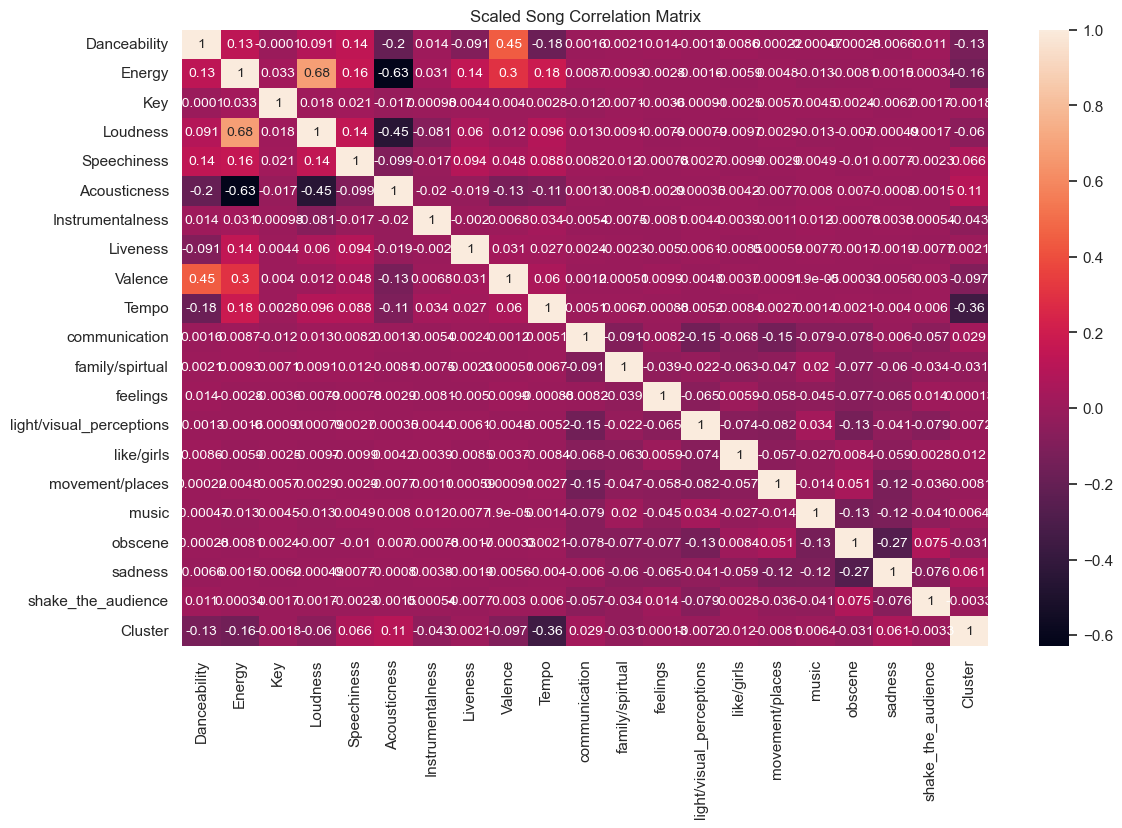

In [130]:
# display correlation matrix on scaled data
song_corr_matrix = song_df_scaled.corr()

plt.figure(figsize=(13, 8))
sns.heatmap(song_corr_matrix, annot=True, annot_kws={"size": 10 })
plt.title('Scaled Song Correlation Matrix')
plt.show()

In [ ]:
# encode labels

In [10]:
# train test split